In [1]:
import os
from comet_ml.api import API

comet_api = API(os.environ["COMETML_API_KEY"])


In [2]:
exps = {
    "peteish32": comet_api.get_experiments("ai2", "peteish32", "peteish32"),
    "peteish13": comet_api.get_experiments("ai2", "olmo-2-1124-13b", "OLMo-2-1124-13B-stage-1"),
}

print(repr({k: len(v) for k, v in exps.items()}))

{'peteish32': 18, 'peteish13': 75}


In [3]:
from tqdm.notebook import tqdm

def download_metric(exps, metric_name):
    result = {}
    for exp in tqdm(exps):
        metrics = exp.get_metrics(metric_name)
        for values in metrics:
            result[values['step']] = float(values['metricValue'])
    result = dict(sorted(result.items()))
    return result

loss = {
    name: download_metric(es, "train/CE loss")
    for name, es in exps.items()
}

  0%|          | 0/18 [00:00<?, ?it/s]

  0%|          | 0/75 [00:00<?, ?it/s]

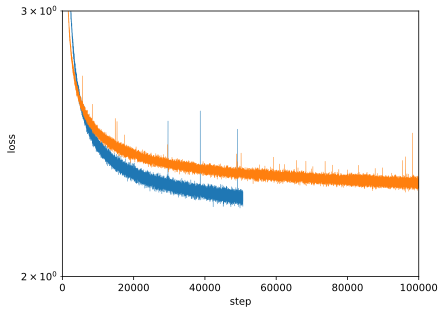

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import numpy as np

fig, ax = plt.subplots()

for name, values in loss.items():
    xs = np.array(list(values.keys()))
    ys = np.array(list(values.values()))
    ax.plot(xs, ys, linewidth=0.5)

ax.set_ylim(2.0, 3.0)
ax.set_xlim(0, 100000)
plt.yscale('log')
plt.xlabel("step")
plt.ylabel("loss")
plt.show()


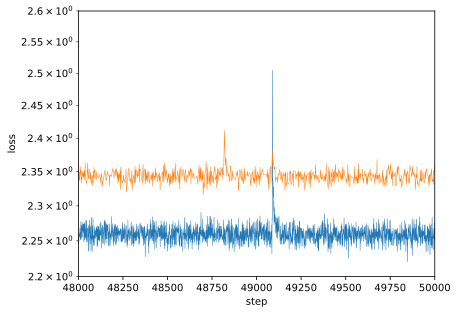

In [7]:
fig, ax = plt.subplots()

for name, values in loss.items():
    xs = np.array(list(values.keys()))
    ys = np.array(list(values.values()))
    ax.plot(xs, ys, linewidth=0.5)

ax.set_ylim(2.2, 2.6)
ax.set_xlim(48000, 50000)
plt.yscale('log')
plt.xlabel("step")
plt.ylabel("loss")
plt.show()


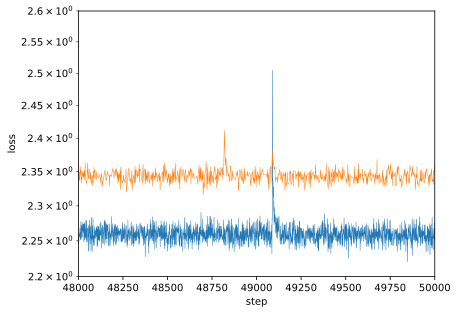

In [9]:
fig, ax = plt.subplots()

for name, values in loss.items():
    xs = np.array(list(values.keys()))
    ys = np.array(list(values.values()))
    ax.plot(xs, ys, linewidth=0.5)

ax.set_ylim(2.2, 2.6)
ax.set_xlim(48000, 50000)
plt.yscale('log')
plt.xlabel("step")
plt.ylabel("loss")
plt.show()

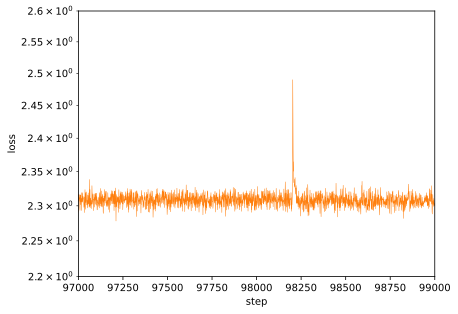

In [25]:
fig, ax = plt.subplots()

for name, values in loss.items():
    xs = np.array(list(values.keys()))
    ys = np.array(list(values.values()))
    ax.plot(xs, ys, linewidth=0.5)

ax.set_ylim(2.2, 2.6)
ax.set_xlim(97000, 99000)
plt.yscale('log')
plt.xlabel("step")
plt.ylabel("loss")
plt.show()